In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

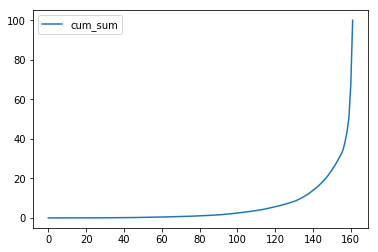

In [3]:
df_wbank = pd.read_csv('clean_wbank_cait_data_2014.csv') # read in csv
df_wbank = df_wbank.dropna() # drop na
df_wbank = df_wbank.sort_values('total_co2', ascending=True).reset_index(drop=True) # sort by emissions
df_wbank['cum_sum'] = 100*df_wbank.total_co2.cumsum()/df_wbank.total_co2.sum() # determine pct emissions

## Plotting cumulative emissions
df_wbank.plot(y='cum_sum')
plt.show()

In [4]:
## Read in geo dataframe and drop unnecessary columns
df_geo = pd.read_csv('geo_data.csv')
df_geo = df_geo.drop(columns=['alpha-2', 'country-code', 'intermediate-region', 'iso_3166-2', 'region-code', 'sub-region-code', 'intermediate-region-code'])

## Combine the two dataframes
df_comb = df_wbank.set_index('country', drop=True).join(df_geo.set_index('name', drop=True), how='inner')
df_comb

,year,GDP,GDP_per_cap,total_co2,pop,cum_sum,alpha-3,region,sub-region
Tuvalu,2014,3.725969e+07,3415.813158,0.0110,1.090800e+04,0.000035,TUV,Oceania,Polynesia
Liechtenstein,2014,6.663501e+09,179478.584800,0.0440,3.712700e+04,0.000175,LIE,Europe,Western Europe
Nauru,2014,1.170204e+08,9872.638314,0.0476,1.185300e+04,0.000327,NRU,Oceania,Micronesia
Kiribati,2014,1.860670e+08,1684.504274,0.0623,1.104580e+05,0.000526,KIR,Oceania,Micronesia
Marshall Islands,2014,1.831141e+08,3461.645053,0.1026,5.289800e+04,0.000853,MHL,Oceania,Micronesia
Tonga,2014,4.434751e+08,4192.349758,0.1209,1.057820e+05,0.001239,TON,Oceania,Polynesia
Dominica,2014,5.281787e+08,7257.395143,0.1356,7.277800e+04,0.001671,DMA,Americas,Latin America and the Caribbean
Vanuatu,2014,8.149543e+08,3148.365103,0.1539,2.588500e+05,0.002162,VUT,Oceania,Melanesia
Comoros,2014,6.477207e+08,852.954308,0.1539,7.593850e+05,0.002653,COM,Africa,Sub-Saharan Africa
Samoa,2014,8.035748e+08,4178.973369,0.1979,1.922900e+05,0.003284,WSM,Oceania,Polynesia


In [5]:
## How many distinct regions are matched in our data? 
sub_reg_list = list(df_comb['sub-region'].unique()) # Create a list of unique sub-regions
sub_reg_num = len(sub_reg_list) # determine the length of the sub-region list

print(f'Number of sub regions: {sub_reg_num}')

Number of sub regions: 17


In [6]:
## Grouping by region
df_groupby_reg = df_comb.groupby(['region']) # Create a groupby object based on region
df_regions = df_groupby_reg.sum().drop(columns=['year', 'GDP_per_cap', 'cum_sum']) # Sum relevant vars across regions
df_regions['Count'] = df_groupby_reg.agg('count')['year'] # Count the number of countries in each region
df_regions

,GDP,total_co2,pop,Count
region,,,,
Africa,1.996504e+12,955.4752,8.910159e+08,42
Americas,7.505730e+12,2127.4011,6.126363e+08,26
Asia,2.392052e+13,17217.0049,4.013075e+09,37
Europe,1.882061e+13,4654.6953,6.493073e+08,34
Oceania,1.686391e+12,419.3468,3.796491e+07,13


In [7]:
df_regions_pct = df_regions.copy() # Create a new df for percentages

pct_cols = ['GDP', 'total_co2', 'pop'] # List of relevant column names
for col in pct_cols: # Here we loop over each column named in the list
    df_regions_pct[col] = 100*df_regions_pct[col]/df_regions_pct[col].sum()
    
df_regions_pct

,GDP,total_co2,pop,Count
region,,,,
Africa,3.702044,3.765579,14.361961,42
Americas,13.917603,8.384202,9.874861,26
Asia,44.354954,67.853145,64.685289,37
Europe,34.898384,18.344405,10.465947,34
Oceania,3.127014,1.652668,0.611943,13
